# LSTM 순환 신경망 모델 : 나비야 동요 학습
- 참고사이트
> https://tykimos.github.io/2017/04/09/RNN_Layer_Talk/

## Chapter1. Dense 사용하기

### 0. 사용할 패키지 불러오기

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# 랜덤시드 고정시키기
np.random.seed(5)

In [4]:
# 데이터셋 생성 함수        
def seq2dataset(seq, window_size):
    dataset = []
    for i in range(len(seq)-window_size):
        subset = seq[i:(i+window_size+1)]
        dataset.append([code2idx[item] for item in subset])
    return np.array(dataset)

### 1. 데이터 준비하기

In [5]:
# 코드 사전 정의

code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}

idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}


In [6]:
# 시퀀스 데이터 정의

seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']


### 2. 데이터셋 생성하기

In [7]:
dataset = seq2dataset(seq, window_size = 4)

print(dataset.shape)
print(dataset)

(50, 5)
[[11  9  2 10  8]
 [ 9  2 10  8  1]
 [ 2 10  8  1  7]
 [10  8  1  7  8]
 [ 8  1  7  8  9]
 [ 1  7  8  9 10]
 [ 7  8  9 10 11]
 [ 8  9 10 11 11]
 [ 9 10 11 11  4]
 [10 11 11  4 11]
 [11 11  4 11  9]
 [11  4 11  9  9]
 [ 4 11  9  9  9]
 [11  9  9  9 10]
 [ 9  9  9 10  8]
 [ 9  9 10  8  1]
 [ 9 10  8  1  7]
 [10  8  1  7  9]
 [ 8  1  7  9 11]
 [ 1  7  9 11 11]
 [ 7  9 11 11  9]
 [ 9 11 11  9  9]
 [11 11  9  9  2]
 [11  9  9  2  8]
 [ 9  9  2  8  8]
 [ 9  2  8  8  8]
 [ 2  8  8  8  8]
 [ 8  8  8  8  8]
 [ 8  8  8  8  9]
 [ 8  8  8  9  3]
 [ 8  8  9  3  9]
 [ 8  9  3  9  9]
 [ 9  3  9  9  9]
 [ 3  9  9  9  9]
 [ 9  9  9  9  9]
 [ 9  9  9  9 10]
 [ 9  9  9 10  4]
 [ 9  9 10  4 11]
 [ 9 10  4 11  9]
 [10  4 11  9  2]
 [ 4 11  9  2 10]
 [11  9  2 10  8]
 [ 9  2 10  8  1]
 [ 2 10  8  1  7]
 [10  8  1  7  9]
 [ 8  1  7  9 11]
 [ 1  7  9 11 11]
 [ 7  9 11 11  9]
 [ 9 11 11  9  9]
 [11 11  9  9  2]]


In [15]:
# 입력(X)과 출력(Y) 변수로 분리하기
x_train = dataset[:,0:4]
y_train = dataset[:,4]

In [16]:
max_idx_value = 13

In [17]:
# 입력값 정규화 시키기
x_train = x_train / float(max_idx_value)

In [18]:
# 라벨값에 대한 one-hot 인코딩 수행
y_train = to_categorical(y_train)
y_train.shape

(50, 12)

In [19]:
one_hot_vec_size = y_train.shape[1]

In [20]:
print("one hot encoding vector size is ", one_hot_vec_size)

one hot encoding vector size is  12


### 3. Dense 모델 구성하기

In [21]:
# model = Sequential()
# model.add(Dense(128, input_dim=4, activation='relu'))
# model.add(Dense(128, activation='relu'))
# model.add(Dense(one_hot_vec_size, activation='softmax'))

inputs = Input(shape=(4,))
x = Dense(128, activation='relu')(inputs)
x = Dense(128, activation='relu')(x)
outputs = Dense(one_hot_vec_size, activation='softmax')(x)
model = Model(inputs=inputs,outputs=outputs)

### 4. 모델 학습과정 설정하기

In [22]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### 5. 모델 학습시키기

In [23]:
history = model.fit(x_train, y_train, epochs=2000, batch_size=10, verbose=0, )

Epoch 1/2000
5/5 [==============================] - 0s 2ms/step - loss: 2.4819 - accuracy: 0.0400
Epoch 2/2000
5/5 [==============================] - 0s 2ms/step - loss: 2.3727 - accuracy: 0.2000
Epoch 3/2000
5/5 [==============================] - 0s 2ms/step - loss: 2.2753 - accuracy: 0.3400
Epoch 4/2000
5/5 [==============================] - 0s 2ms/step - loss: 2.1897 - accuracy: 0.3400
Epoch 5/2000
5/5 [==============================] - 0s 2ms/step - loss: 2.1146 - accuracy: 0.3400
Epoch 6/2000
5/5 [==============================] - 0s 2ms/step - loss: 2.0361 - accuracy: 0.3400
Epoch 7/2000
5/5 [==============================] - 0s 2ms/step - loss: 1.9897 - accuracy: 0.3400
Epoch 8/2000
5/5 [==============================] - 0s 2ms/step - loss: 1.9527 - accuracy: 0.3400
Epoch 9/2000
5/5 [==============================] - 0s 2ms/step - loss: 1.9262 - accuracy: 0.3400
Epoch 10/2000
5/5 [==============================] - 0s 2ms/step - loss: 1.9053 - accuracy: 0.3400
Epoch 11/2000
5/5 [

### 6. 학습과정 살펴보기

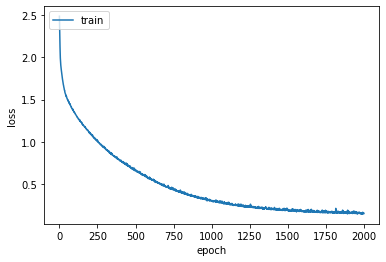

In [24]:
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

### 7. 모델 평가하기

In [25]:
scores = model.evaluate(x_train, y_train)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

2/2 [==============================] - 0s 3ms/step - loss: 0.1502 - accuracy: 0.9200
accuracy: 92.00%


### 8. 모델 사용하기


In [26]:
pred_count = 50 # 최대 예측 개수 정의

In [27]:
x_train.shape

(50, 4)

In [29]:
# 한 스텝 예측

seq_out = ['g8', 'e8', 'e4', 'f8']
pred_out = model.predict(x_train)
print(pred_out.shape)

for i in range(pred_count):
    idx = np.argmax(pred_out[i]) # one-hot 인코딩을 인덱스 값으로 변환
    seq_out.append(idx2code[idx]) # seq_out는 최종 악보이므로 인덱스 값을 코드로 변환하여 저장
    
print("one step prediction : ", seq_out)

(50, 12)
one step prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'e8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'd8', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']


In [30]:
# 곡 전체 예측

seq_in = ['g8', 'e8', 'e4', 'f8']
seq_out = seq_in
seq_in = [code2idx[it] / float(max_idx_value) for it in seq_in] # 코드를 인덱스값으로 변환

for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1, 4)) # batch_size, feature
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    seq_in.append(idx / float(max_idx_value))
    seq_in.pop(0)

print("full song prediction : ", seq_out)

full song prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8']


## Chapter2. 기본 LSTM 모델
- 128 메모리 셀을 가진 LSTM 레이어 1개와 Dense 레이어로 구성
- 입력은 샘플이 50개, 타임스텝이 4개, 속성이 1개로 구성
- 상태유지(stateful) 모드 비활성화

### # 0. 사용할 패키지 불러오기

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Input, LSTM
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [33]:
# 랜덤시드 고정시키기
np.random.seed(5)

In [34]:
# 데이터셋 생성 함수
def seq2dataset(seq, window_size):
    dataset = []
    for i in range(len(seq)-window_size):
        subset = seq[i:(i+window_size+1)]
        dataset.append([code2idx[item] for item in subset])
    return np.array(dataset)


### 1. 데이터 준비하기

In [35]:
# 코드 사전 정의

code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}

idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}


In [36]:
# 시퀀스 데이터 정의

seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

### 2. 데이터셋 생성하기

In [37]:
dataset = seq2dataset(seq, window_size = 4)
print(dataset.shape)

(50, 5)


In [38]:
# 입력(X)과 출력(Y) 변수로 분리하기
x_train = dataset[:,0:4]
y_train = dataset[:,4]

In [39]:
max_idx_value = 13

In [40]:
# 입력값 정규화 시키기
x_train = x_train / float(max_idx_value)

In [41]:
# 입력을 (샘플 수, 타입스텝, 특성 수)로 형태 변환
x_train = np.reshape(x_train, (50, 4, 1))

In [42]:
# 라벨값에 대한 one-hot 인코딩 수행
y_train = to_categorical(y_train)

In [43]:
one_hot_vec_size = y_train.shape[1]
print("one hot encoding vector size is ", one_hot_vec_size)

one hot encoding vector size is  12


### 3. 모델 구성하기

In [44]:
# model = Sequential()
# model.add(LSTM(128, input_shape = (4, 1)))
# model.add(Dense(one_hot_vec_size, activation='softmax'))

inputs = Input(shape=(4,1))
x = LSTM(128)(inputs)
outputs = Dense(one_hot_vec_size, activation='softmax')(x)
model = Model(inputs=inputs, outputs=outputs)

### 4. 모델 학습과정 설정하기

In [45]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### 5. 모델 학습시키기

In [47]:
history = model.fit(x_train, y_train, epochs=2000, batch_size=14, verbose=0,  )

### 6. 학습과정 살펴보기

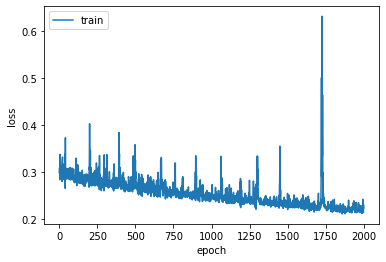

In [48]:
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

### 7. 모델 평가하기

In [49]:
scores = model.evaluate(x_train, y_train)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

2/2 [==============================] - 0s 3ms/step - loss: 0.2089 - accuracy: 0.9000
accuracy: 90.00%


### 8. 모델 사용하기

In [50]:
pred_count = 50 # 최대 예측 개수 정의

In [51]:
# 한 스텝 예측

seq_out = ['g8', 'e8', 'e4', 'f8']
pred_out = model.predict(x_train)

for i in range(pred_count):
    idx = np.argmax(pred_out[i]) # one-hot 인코딩을 인덱스 값으로 변환
    seq_out.append(idx2code[idx]) # seq_out는 최종 악보이므로 인덱스 값을 코드로 변환하여 저장
    
print("one step prediction : ", seq_out)

one step prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'g4', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'e8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']


In [52]:
# 곡 전체 예측

seq_in = ['g8', 'e8', 'e4', 'f8']
seq_out = seq_in
seq_in = [code2idx[it] / float(max_idx_value) for it in seq_in] # 코드를 인덱스값으로 변환

for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1, 4, 1)) # 샘플 수, 타입스텝 수, 속성 수
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    seq_in.append(idx / float(max_idx_value))
    seq_in.pop(0)

print("full song prediction : ", seq_out)

full song prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8']


## Chapter3. 상태유지 LSTM 모델
- 긴 시퀀드 데이터를 처리할 때, LSTM 모델은 상태유지 모드에서 그 진가를 발휘합니다
- 상태유지 LSTM 모델을 생성하기 위해서는 LSTM 레이어 생성 시, stateful=True로 설정하면 됩니다
- 또한 상태유지 모드에서는 입력형태를 batch_input_shape = (배치사이즈, 타임스텝, 속성)으로 설정해야 합니다

### # 0. 사용할 패키지 불러오기

In [53]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Input, LSTM
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [54]:
# 랜덤시드 고정시키기
np.random.seed(5)

In [55]:
# 데이터셋 생성 함수
def seq2dataset(seq, window_size):
    dataset = []
    for i in range(len(seq)-window_size):
        subset = seq[i:(i+window_size+1)]
        dataset.append([code2idx[item] for item in subset])
    return np.array(dataset)


### 1. 데이터 준비하기

In [56]:
# 코드 사전 정의

code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}

idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}


In [57]:
# 시퀀스 데이터 정의

seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

### 2. 데이터셋 생성하기

In [58]:
dataset = seq2dataset(seq, window_size = 4)
print(dataset.shape)

(50, 5)


In [59]:
# 입력(X)과 출력(Y) 변수로 분리하기
x_train = dataset[:,0:4]
y_train = dataset[:,4]

In [60]:
max_idx_value = 13

In [61]:
# 입력값 정규화 시키기
x_train = x_train / float(max_idx_value)

In [62]:
# 입력을 (샘플 수, 타입스텝, 특성 수)로 형태 변환
x_train = np.reshape(x_train, (50, 4, 1))

In [63]:
# 라벨값에 대한 one-hot 인코딩 수행
y_train = to_categorical(y_train)

In [64]:
one_hot_vec_size = y_train.shape[1]
print("one hot encoding vector size is ", one_hot_vec_size)

one hot encoding vector size is  12


### 3. 모델 구성하기

In [67]:
batch_size = 5

In [72]:
# model = Sequential()
# model.add(LSTM(128, batch_input_shape = (batch_size, 4, 1), stateful=True, return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(128, batch_input_shape = (batch_size, 4, 1), stateful=True, ))
# model.add(Dense(one_hot_vec_size, activation='softmax'))

# batch_input_shape = (배치사이즈, 타임스텝, 속성)
inputs = Input(batch_shape=(batch_size, 4, 1))
x = LSTM(128, batch_input_shape = (batch_size, 4, 1), stateful=True, return_sequences=True)(inputs)
x = Dropout(0.2)(x)
x = LSTM(128, batch_input_shape = (batch_size, 4, 1), stateful=True, )(x)
outputs = Dense(one_hot_vec_size, activation='softmax')(x)
model = Model(inputs=inputs, outputs=outputs)

In [72]:
################

### 4. 모델 학습과정 설정하기

In [73]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### 5. 모델 학습시키기

In [ ]:
history = model.fit(x_train, y_train, epochs=2000, batch_size=14, verbose=0,  )

### 6. 학습과정 살펴보기

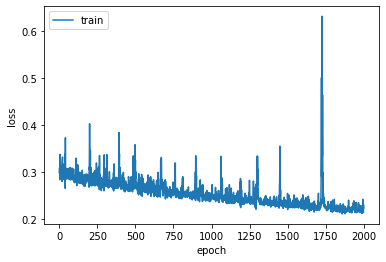

In [ ]:
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

### 7. 모델 평가하기

In [ ]:
scores = model.evaluate(x_train, y_train)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

2/2 [==============================] - 0s 3ms/step - loss: 0.2089 - accuracy: 0.9000
accuracy: 90.00%


### 8. 모델 사용하기

In [ ]:
pred_count = 50 # 최대 예측 개수 정의

In [ ]:
# 한 스텝 예측

seq_out = ['g8', 'e8', 'e4', 'f8']
pred_out = model.predict(x_train)

for i in range(pred_count):
    idx = np.argmax(pred_out[i]) # one-hot 인코딩을 인덱스 값으로 변환
    seq_out.append(idx2code[idx]) # seq_out는 최종 악보이므로 인덱스 값을 코드로 변환하여 저장
    
print("one step prediction : ", seq_out)

one step prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'g4', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'e8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']


In [ ]:
# 곡 전체 예측

seq_in = ['g8', 'e8', 'e4', 'f8']
seq_out = seq_in
seq_in = [code2idx[it] / float(max_idx_value) for it in seq_in] # 코드를 인덱스값으로 변환

for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1, 4, 1)) # 샘플 수, 타입스텝 수, 속성 수
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    seq_in.append(idx / float(max_idx_value))
    seq_in.pop(0)

print("full song prediction : ", seq_out)

full song prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8']
